# <center>Centro Universitário Facens<br/></center>
<br/>
<font size="4"><center><b>Disciplina: Processamento de imagens</b></center></font>
  
<font size="3"><center>Prof. Dr. Renato M. Silva</center></font>
<br/>
<br/>

## <center>Avaliação Continuada 2 (AC2)</center>


----
#### <center>RA, Turma e nome dos componentes do grupo</center>

    
| RA       | Turma        |      Nome     | 
|:-        |:-            |:-------------:|
|210475    |CP701TIN1     | Guilherme Siqueira de Grado Pereira |  
|210095    |CP701TIN1     | João Vítor Michel Silva             |  
|210135    |CP701TIN1     | Lucas Garcia Fragoso                |  
|210498    |CP701TIN1     | Mateus Martins Freitas              |  
|210199    |CP701TIN1     | Pedro Gabriel dos Santos            |  
    

----
### Instruções

**1**. Leia atentamente esta seção e as descrições de cada exercício para garantir que você está executando o que foi pedido.
- O não atendimento de qualquer item descrito, implicará perda de nota.

**2**. O trabalho pode ser feito em grupos de no mínimo 2 pessoas e no máximo 5 pessoas.
 - Apenas uma pessoa do grupo deve submeter o trabalho. 
 - Você deve submeter apenas o arquivo .ipynb.
 - O grupo poderá ser composto por pessoas de qualquer uma das três turmas de processamento de imagens
 
**3**. Siga boas práticas de programação:
- dar nomes intuitivos para as variáveis
- dar nomes intuitivos para as funções
- comentar o código sempre que necessário

**4**. Cuidado com plágio. Se for detectado plágio entre grupos, a punição será dada para todos os componentes dos grupos envolvidos. 

**5**. Antes de submeter o notebook, certifique-se que não há erros de código. Uma forma de se certificar disso é usar a opção **"Reiniciar Kernel e executar todas as células"** do Jupyter ou a opção **"Reiniciar e executar tudo"** do Google Colab. 

**6**. A única biblioteca de processamento de imagens permitida neste trabalho é a **OpenCV**. Porém, alguns exercícios poderão limitar algumas funções dessa biblioteca que poderão ser usadas. 
- Mesmo nos exercícios que limitam o uso de funções da OpenCV, considere que as operações básicas como abrir, transformar para outro formato de cor e salvar, podem ser feitas com as funções da biblioteca.

**7**. Em todos os exercícios que pedirem para salvar a imagem resultante, tome cuidado de converter a imagem para BGR antes de salvá-la pois esse é o formato padrão da biblioteca OpenCV. Caso contrário, os canais de cores da imagem resultante ficarão trocados. 

**8**. Em todos os exercícios, plote na tela as mesmas imagens que o exercício pedir para salvar. 
- Não é permitido usar a função cv2.imshow() para plotar as imagens. Essa regra é para evitar incompatibilidade e prejudicar a correção. Sempre use a biblioteca matplotlib.

**9**. Em todos os exercícios, as imagens finais solicitadas devem estar no formato **uint8**.

**10**. Em todos os exercícios você deve tratar tons de cinza inválidos usando a técnica de saturação, há não ser que seja explicitamente pedida outra técnica. Sempre tome cuidado para que as operações executadas não causem desequilíbrio de cores.

----
## Preparação 

Abaixo são inicializadas as bibliotecas e é definido o caminho das pasta **figs** onde estão as imagens usadas em cada exercício. É definido também o caminho da pasta **figs_resultado**, onde você deve salvar as imagens resultantes. 

Se for necessário, você pode alterar a variável que define esse caminho, porém use ela em todos os exercícios. 

In [165]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

pathFigs = "figs/" # path das imagens que devem ser usadas
pathRes = "figs_resultado/" # path da pasta onde as imagens devem ser salvas

# Cria uma pasta onde as imagens devem ser salvas, se ela não existir
if not os.path.isdir(pathRes):
    os.mkdir(pathRes)

----
## Exercicio 1
Faça uma função que receba dois parâmetros:
 - **imagem1**: uma imagem monocromática ou RGB
 - **imagem2**: uma imagem do mesmo tamanho que a imagem anterior, mas que seja toda preta e que possua apenas um retângulo na cor branca
    
Essa função deve retornar qual a quantidade mínima total de bytes que seria necessário para representar a região da **imagem1** que está localizada na mesma posição do retângulo da **imagem2**.

Teste sua função usando as imagens **figs/natureza.jpeg** e **figs/natureza_regiao.jpeg**.

Obs: não é permitido usar nenhuma função pronta da biblioteca OpenCV. 

In [166]:
def qtdRepresentacao(img1, img2):

    img1 = cv2.imread(img1)
    img2 = cv2.imread(img2)

    white_indices = np.where(img2 > 240)
    min_y = np.min(white_indices[0])
    max_y = np.max(white_indices[0])
    min_x = np.min(white_indices[1])
    max_x = np.max(white_indices[1])

    secao_img1 = img1[min_y : max_y + 1, min_x : max_x + 1]
    altura, largura, canais = secao_img1.shape

    tamanho_minimo_calculado = altura * largura * canais

    return tamanho_minimo_calculado


qtdRepresentacao("figs/natureza.jpeg", "figs/natureza_regiao.jpeg")

104538

----
## Exercicio 2

Use as imagens **figs/procurado.jpg** e **figs/tripaSeca.png** para criar um cartaz de procurado igual ao apresentado na imagem na imagem **figs/tripaSeca_procurado.png**.

Você pode aplicar qualquer técnica aprendida na disciplina e qualquer sequência de operações para chegar no resultado esperado. Porém, sugere-se a seguinte sequência:
- Remova o texto do cartaz usando máscara de cor, conforme ensinado no notebook de operações aritméticas. Porém, em vez de aplicar na imagem inteira, selecione apenas a região onde está o texto para facilitar. 
- Ao remover o texto, ficarão marcas do texto antigo. Para removê-las, aplique algum filtro passa-baixa. 
- Adicione o texto novo usando a função putText da OpenCV
- Aplique um novo filtro passa-baixa para que a imagem do cartaz fique um pouco borrada de forma a similar a foto do personagem. 
- Aumente a imagem **figs/tripaSeca.png** para o rosto do personagem caber na região adequada da imagem **figs/procurado.jpg**. 
- Aplique equalização no rosto do personagem
- Adicione o rosto do personagem no cartaz

Salve a imagem resultante no caminho **figs_resultado/ex02_tripaSeca_procurado.png**

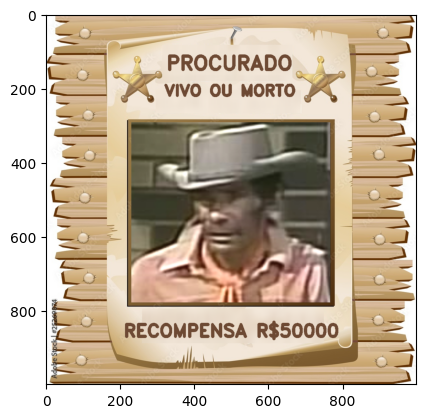

In [167]:
image = cv2.imread("figs/procurado.jpg")

background_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


def normalize_image(image, crop, threshold, channel, replacement_color):

    cropped_img = image[crop[0] : crop[1], crop[2] : crop[3]]

    # verifica se os pixeeis do canal RGB informado é menor que o threshold
    mask = cropped_img[:, :, channel] < threshold
    cropped_img[mask] = replacement_color

    blurred_img = cv2.GaussianBlur(cropped_img, ksize=(33, 33), sigmaX=14, sigmaY=None)

    image[crop[0] : crop[1], crop[2] : crop[3]] = blurred_img

    return image


imageBlank1 = normalize_image(
    background_rgb,
    crop=(83, 181, 313, 664),
    threshold=140,
    channel=0,
    replacement_color=[243, 231, 217],
)

imageBlank2 = normalize_image(
    imageBlank1,
    crop=(205, 268, 296, 687),
    threshold=140,
    channel=0,
    replacement_color=[243, 231, 217],
)
imageBlank3 = normalize_image(
    imageBlank2,
    crop=(795, 888, 259, 749),
    threshold=140,
    channel=0,
    replacement_color=[233, 217, 201],
)

cv2.putText(
    imageBlank3,
    "PROCURADO",
    (325, 150),
    cv2.FONT_HERSHEY_DUPLEX,
    fontScale=1.8,
    color=(109, 73, 51),
    thickness=6,
)
cv2.putText(
    imageBlank3,
    "VIVO OU MORTO",
    (319, 220),
    cv2.FONT_HERSHEY_DUPLEX,
    fontScale=1.4,
    color=(109, 73, 51),
    thickness=6,
)
cv2.putText(
    imageBlank3,
    "RECOMPENSA R$50000",
    (210, 870),
    cv2.FONT_HERSHEY_DUPLEX,
    fontScale=1.6,
    color=(109, 73, 51),
    thickness=6,
)

image_tripaSeca = cv2.imread("figs/tripaSeca.png")
image_tripaSeca_RGB = cv2.cvtColor(image_tripaSeca, cv2.COLOR_BGR2RGB)
crop_tripaSeca = image_tripaSeca_RGB[46:198, 350:498]
x, y = 766 - 230, 778 - 292
# Redimensiona a imagem para ter o mesmo tamanho do quadro da imagem de fundo
crop_tripaSeca = cv2.resize(crop_tripaSeca, (x, y))
crop_tripaSeca = cv2.convertScaleAbs(crop_tripaSeca, alpha=1.2, beta=7)
crop_tripaSeca = cv2.GaussianBlur(crop_tripaSeca, ksize=(5, 5), sigmaX=0.5)

imageBlank3[292:778, 230:766] = crop_tripaSeca

if imageBlank3.dtype != 'uint8':
    imageBlank3 = cv2.convertScaleAbs(imageBlank3)

plt.imsave('figs_resultado/ex02_tripaSeca_procurado.png', imageBlank3)

plt.imshow(imageBlank3)
plt.show()

----
## Exercicio 3

Remova o ruído da imagem **figs/faculdade.png** usando operações morfológicas. O resultado mínimo esperado é apresentado na imagem **figs/faculdade_corrigida.png**. 

Salve a imagem resultante no caminho **figs_resultado/ex03.png**.

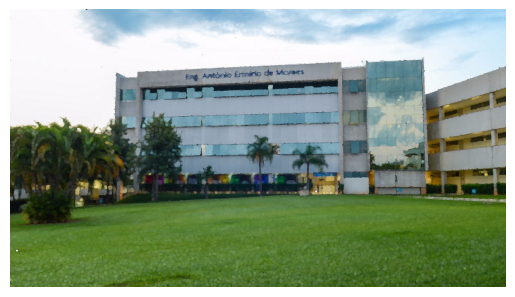

In [168]:
image = cv2.imread("figs/faculdade.png")
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

kernel = np.ones((1, 1), np.uint8)
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=1)
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=1)


img = cv2.dilate(img, kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2)))
img = cv2.erode(img, kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (6, 6)))

img = cv2.dilate(img, kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (6, 6)))

img = cv2.erode(img, kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 1)))
img = cv2.dilate(img, kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))


kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

img = cv2.filter2D(img, -1, kernel)

if img.dtype != 'uint8':
    img = cv2.convertScaleAbs(img)

plt.imshow(img)
plt.axis("off")
plt.imsave("figs_resultado/ex03.png", img)

----
## Exercicio 4

Crie uma matriz usando a biblioteca numpy. Depois, transforme essa matriz em uma imagem que corresponda a bandeira mostrada na figura **figs/bandeira.png**
 
Para gerar a bandeira, você poderá fazer apenas as seguintes operações:

- operações morfológicas nos símbolos contidos na imagem **figs/simbolos.png**;
- operações aritméticas entre a matriz e os símbolos contidos na imagem **figs/simbolos.png**; 
- operações matriciais, tanto para gerar e transformar cores, quanto para gerar os retângulos que fazem parte da bandeira.

Salve a imagem resultante no caminho **figs_resultado/ex04_bandeira.png**

Obs: as únicas funções prontas da biblioteca OpenCV que podem ser usadas neste exercícios são as que executam operações morfológicas.

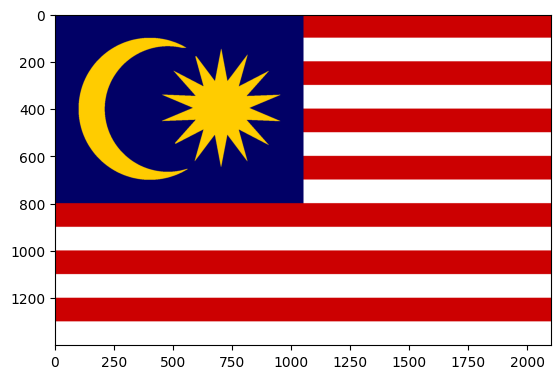

In [169]:
bandeira = cv2.imread("figs/bandeira.png")
bandeira = cv2.cvtColor(bandeira, cv2.COLOR_BGR2RGB)

colors = {
    "yellow": [255, 204, 0, 255],
    "blue": [1, 0, 102, 255],
    "red": [204, 0, 1, 255],
    "white": [255, 255, 255, 255],
}

screen = np.ones((bandeira.shape[0], bandeira.shape[1], 4), np.uint8)
screen[:, :, :] = colors["white"]

for n in range(0, bandeira.shape[0], 200):
    screen[n : n + 100, :, :] = colors["red"]

screen[:800, :1050, :] = colors["blue"]

# cv2.IMREAD_UNCHANGED esconde os pixeis invisiveis da imagem
simbolo = cv2.imread("figs/simbolos.png", cv2.IMREAD_UNCHANGED)
simboloRGB = cv2.cvtColor(simbolo, cv2.COLOR_BGR2RGBA)

moon = simboloRGB[15:628, 18:497]
star = simboloRGB[643:, 40:553]

moonH, moonW, _ = moon.shape
starH, starW, _ = star.shape


for i in range(simboloRGB.shape[0]):
    for j in range(simboloRGB.shape[1]):
        if simboloRGB[i, j, 3] != 0:
            simboloRGB[i, j, :] = colors["yellow"]


moon[np.all(moon[:, :, :3] == [0, 0, 0], axis=-1)] = colors["blue"]
star[np.all(star[:, :, :3] == [0, 0, 0], axis=-1)] = colors["blue"]


screen[94 : 94 + moonH, 94 : 94 + moonW] = moon
screen[143 : 143 + starH, 445 : 445 + starW] = star

if screen.dtype != 'uint8':
    screen = cv2.convertScaleAbs(screen)

plt.imsave("figs_resultado/ex04_bandeira.png",screen)
plt.imshow(screen)
plt.show()

----
## Exercicio 5

Crie uma função que receba uma imagem e modifique ela para que fique quadrada. Se a imagem estiver na orientação paisagem, você precisará adicionar espaço na parte superior e inferior. Da mesma forma, para retrato (mais alto que largo), você adicionará espaço nas laterais. Certifique-se de que seu programa centralize a imagem entre o espaço.

Para preecher o novo espaço, você deverá testar apresentar as duas variações a seguir:
- Supondo que o novo espaço possua uma quantidade de $n$ linhas ou colunas, você deverá preenchê-lo com as $n$ linhas ou colunas vizinhas da imagem. Depois disso, você deverá aplicar uma filtro de média nessa região. 
 - Você deverá criar seu próprio filtro de média. Não é permitido usar nenhuma função pronta para isso. Considere sempre que será criado padding na imagem para que o filtro resulte em uma imagem do mesmo tamanho. Considere também que a máscara sempre será quadrada e com tamanho ímpar. 

- Supondo que o novo espaço possua uma quantidade de $n$ linhas ou colunas, você deverá preencher com a média de todos os valores RGB das $n$ linhas ou colunas vizinhas da imagem.

Teste a função nas imagens **figs/praia.jpg** e **figs/houses.jpg**. 
Salve as imagens resultante nos caminhos **figs_resultado/ex05_praia.png** e **figs_resultado/ex05_houses.png**.

Obs. Neste exercício, não é permitido usar usada nenhuma função pronta da OpenCV. Além disso, as únicas funções prontas do Numpy que podem ser usada são np.pad, np.mean, np.sum, np.ones e np.zeros. 

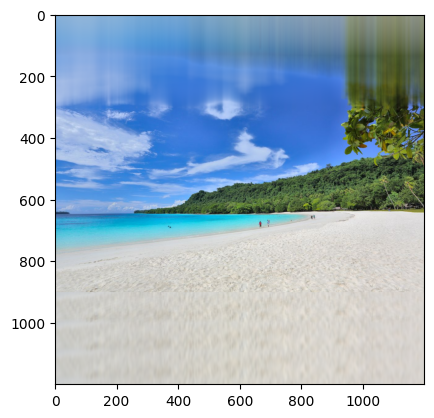

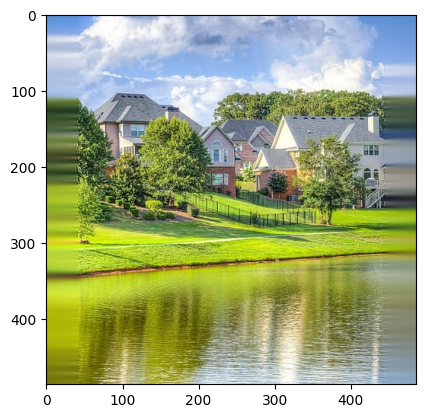

In [170]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def square_image_with_mean_filter(img_path):

    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width, _ = image.shape

    max_dim = max(height, width)
    square_image = np.zeros((max_dim, max_dim, 3), dtype=np.uint8)
    
    # Calcula o início das linhas e colunas para centralizar a imagem
    start_h = (max_dim - height) // 2
    start_w = (max_dim - width) // 2

    # Coloca a imagem original no centro da nova imagem
    square_image[start_h : start_h + height, start_w : start_w + width, :] = image

    # # Preenche as bordas horizontais
    for i in range(start_h):
        for j in range(start_w, start_w + width):

            c1,c2 = i+3, i+10
            
            R = np.mean(square_image[max(1 , start_h - i + c1) : start_h + i + c2, max(0, j - 1) : j + 2, 0])
            G = np.mean(square_image[max(1 , start_h - i + c1) : start_h + i + c2, max(0, j - 1) : j + 2, 1])
            B = np.mean(square_image[max(1 , start_h - i + c1) : start_h + i + c2, max(0, j - 1) : j + 2, 2])
            
            square_image[start_h-i+2, j, :] = [R, G, B]

    for i in range(start_h + height, max_dim):
        for j in range(start_w, start_w + width):
            
            R = np.mean(square_image[i - 100 : i - 85, max(0, j - 1) : j + 2, 0])
            G = np.mean(square_image[i - 100 : i - 85, max(0, j - 1) : j + 2, 1])
            B = np.mean(square_image[i - 100 : i - 85, max(0, j - 1) : j + 2, 2])

            square_image[i, j, :] = [R,G,B]


    # # Preenche as bordas verticais
    for j in range(start_w):
        for i in range(max_dim):

            R = np.mean(square_image[max(0, i - 1) : i + 2, start_w - j + 2 : start_w - j + 5, 0])
            G = np.mean(square_image[max(0, i - 1) : i + 2, start_w - j + 2 : start_w - j + 5, 1])
            B = np.mean(square_image[max(0, i - 1) : i + 2, start_w - j + 2 : start_w - j + 5, 2])
            
            square_image[i, max(0, start_w-j), :] = [R,G,B]

    for j in range(start_w + width, max_dim):
        for i in range(max_dim):

            R = np.mean(square_image[max(0, i - 1) : i + 2, j - 5 : j, 0])
            G = np.mean(square_image[max(0, i - 1) : i + 2, j - 5 : j, 1])
            B = np.mean(square_image[max(0, i - 1) : i + 2, j - 5 : j, 2])
            square_image[i, j, :] = [R, G, B]

    return square_image


image1 = square_image_with_mean_filter("figs/praia.jpg")
plt.imsave("figs_resultado/ex05_houses.png", image1)

image2 = square_image_with_mean_filter("figs/houses.jpg")
plt.imsave("figs_resultado/ex05_houses.png", image2)


plt.imshow(image1)
plt.show()

plt.imshow(image2)
plt.show()


----
## Exercicio 6

Separe os círculos das linhas na **figs/circulos_retas.png**. Salve as imagens resultantes nos caminhos **figs_resultado/circulo.png** e **figs_resultado/linha.png**. A imagem **figs_resultado/ex06_circulo.png** deve conter apenas círculos e a imagem **figs_resultado/ex06_linha.png** deve conter apenas linhas. Para conseguir separar os objetos, você só pode aplicar operações morfológicas e operações aritméticas (soma, subtração, etc). 
 - Não é permitido usar limiarização para resolver o problema

Obs. A biblioteca OpenCV só pode ser usada para criar erosão ou dilatação. Qualquer outra operação morfológica deve ser feita combinando erosão ou dilatação, sem usar nenhuma função pronta.

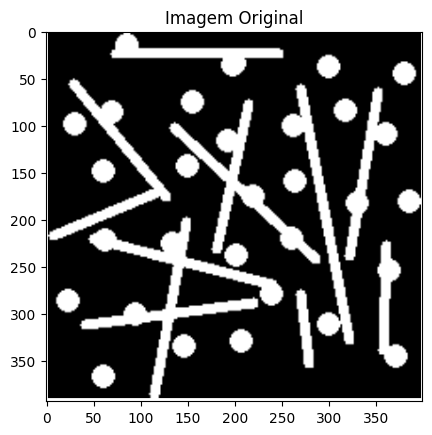

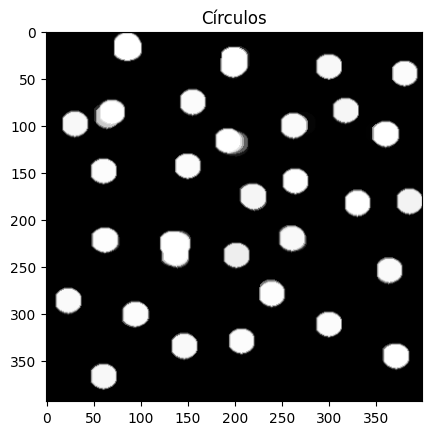

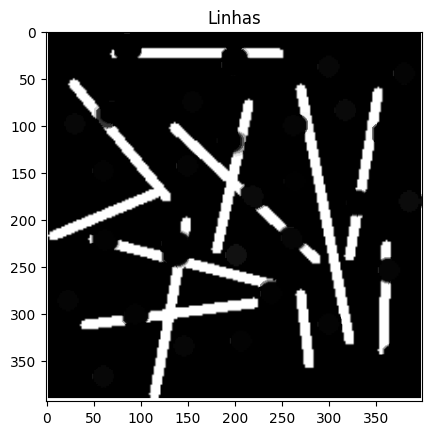

True

In [174]:
# Carregar a imagem
img = cv2.imread("figs/circulos_retas.png", cv2.IMREAD_GRAYSCALE)

# Cria elementos estruturantes elípticos de diferentes tamanhos
elemEstrutGrande = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
elemEstrutPequeno = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Realiza a erosão para reduzir os círculos
imgErosao = cv2.erode(img, elemEstrutGrande)

# Realiza uma dilatação extra com o elemento estruturante menor para suavizar as bordas
imgDilateExtra = cv2.dilate(imgErosao, elemEstrutPequeno)

# Realiza a dilatação final com o elemento estruturante grande para recuperar os círculos
imgCirculos = cv2.dilate(imgDilateExtra, elemEstrutGrande)

# Calcula a diferença entre a imagem original e a imagem com os círculos para obter as linhas
imgLinhas = cv2.subtract(img, imgCirculos)

# Exibe as imagens
plt.imshow(img, 'gray', vmin=0, vmax=255)
plt.title('Imagem Original')
plt.show()

plt.imshow(imgCirculos, 'gray', vmin=0, vmax=255)
plt.title('Círculos')
plt.show()

plt.imshow(imgLinhas, 'gray', vmin=0, vmax=255)
plt.title('Linhas')
plt.show()

# Salva as imagens 
cv2.imwrite('figs_resultado/ex6_circulo.png', imgCirculos.astype(np.uint8))
cv2.imwrite('figs_resultado/ex6_linha.png', imgLinhas.astype(np.uint8))


----
## Exercicio 7

Com base nas noções de vizinhança, adjacência e componentes conexos ensinados na disciplina, crie uma função que receba uma imagem com cores preto e branco e conte quando objetos brancos existem nela. Considere uma conectividade-4. 

Teste sua função na imagem **figs/circles.png**

Número de objetos brancos: 4


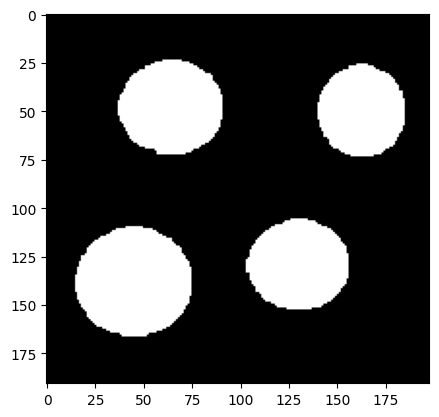

In [172]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


def contar_objetos(img):
    # A função verifica se as coordenadas (x, y) estão dentro dos limites da imagem
    def dentro_da_img(x, y, shape):
        return 0 <= x < shape[1] and 0 <= y < shape[0]

    # Marca cada pixel visitado como True e explora recursivamente seus vizinhos
    def dfs(x, y):
        visitados[y][x] = True
        # Loop para explorar os vizinhos nas direções direita, esquerda, cima e baixo
        for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
            nx, ny = x + dx, y + dy
            # Checa se o vizinho está dentro dos limites e se não foi visitado e é branco.
            if dentro_da_img(nx, ny, img.shape) and not visitados[ny][nx] and img[ny][nx] == 255:
                dfs(nx, ny)

    # Inicializa a matriz de visitados com False, indicando que nenhum pixel foi visitado
    visitados = [[False for _ in range(img.shape[1])] for _ in range(img.shape[0])]
    objetos = 0  # Contador de objetos brancos

    # Loop para percorrer todos os pixels da imagem.
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            # Se o pixel atual não foi visitado e é branco, um novo objeto é encontrado
            if not visitados[y][x] and img[y][x] == 255:
                objetos += 1
                dfs(x, y)  # Explora todos os pixels conectados a este

    return objetos  

# Carregar a imagem
img = cv2.imread('figs/circles.png', 0)

# Contar objetos brancos
objetos = contar_objetos(img)

# Converter para o formato uint8 e aplicar a saturação
img = np.clip(img, 0, 255).astype(np.uint8)

print("Número de objetos brancos:", objetos)

# Plotar a imagem
plt.imshow(img, 'gray', vmin=0, vmax=255)
plt.show()


----
## Exercicio 8

Extraia os contornos da rachadura da imagem **figs/rachadura.jpg**. Para isso, é permitido aplicar apenas as seguintes operações: alguma técnica de segmentação, alguma técnica de limiarização automática e algum filtro. 
 - Limite-se aos métodos ensinados na disciplina
 
O resultado mínimo esperado é apresentado na imagem **figs_resultado/rachadura_contorno.png**

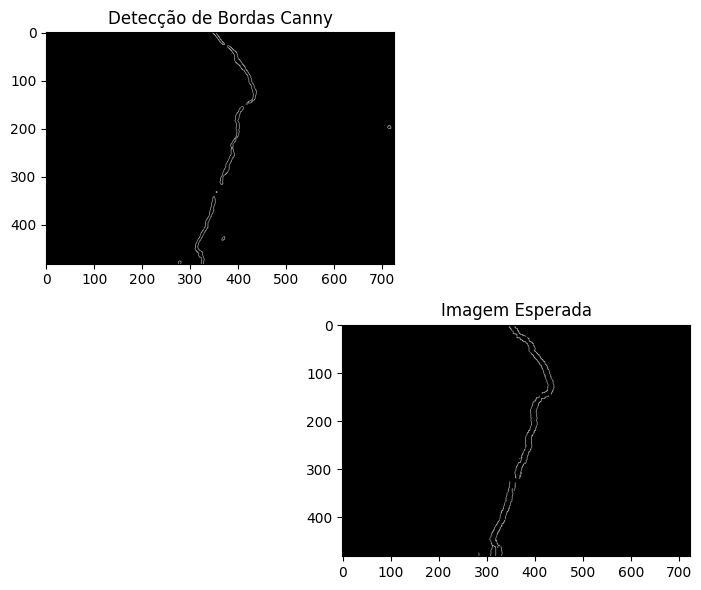

In [173]:
import cv2
import matplotlib.pyplot as plt


# Carregar a imagem
img = cv2.imread('figs/rachadura.jpg', 0)

# Aplicar filtro de mediana para suavizar a imagem
suavizada = cv2.medianBlur(img, 7)

# Aplicar a transformada de Otzu para obter o limiar ideal
limiar, imgOtzu = cv2.threshold(suavizada, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Aplicar o detector de bordas Canny
imgCanny = cv2.Canny(imgOtzu, threshold1=100, threshold2=200)

imgEsperada = cv2.imread('figs/rachadura_contorno.png', 0)

# Salvar as imagen
cv2.imwrite('figs_resultado/rachadura_canny.png', imgCanny.astype(np.uint8))

# Exibir as imagens
plt.figure(figsize=(12, 6))

plt.subplot(2, 2,1)
plt.imshow(imgCanny, 'gray', vmin=0, vmax=255)
plt.title('Detecção de Bordas Canny')

plt.subplot(2, 1, 2)
plt.imshow(imgEsperada, 'gray', vmin=0, vmax=255)
plt.title('Imagem Esperada')

plt.tight_layout()
plt.show()